## Admission Dataset

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
adm = pd.read_csv(r"data/mimic-iii-clinical-database-1.4/ADMISSIONS.csv")

In [17]:
adm[["SUBJECT_ID"]].count()

SUBJECT_ID    58976
dtype: int64

In [19]:
adm["ADMITTIME"] = pd.to_datetime(adm["ADMITTIME"])
adm["DISCHTIME"] = pd.to_datetime(adm["DISCHTIME"])

In [34]:
adm["stay"] = (adm["DISCHTIME"] - adm["ADMITTIME"])

In [36]:
adm["stay"].describe()

count                      58976
mean     10 days 03:12:50.349294
std      12 days 10:57:37.335463
min            -1 days +01:19:00
25%              3 days 17:51:00
50%              6 days 11:12:30
75%             11 days 19:05:00
max            294 days 15:51:00
Name: stay, dtype: object

In [ ]:
adm["stay"] = (adm["DISCHTIME"] - adm["ADMITTIME"])

In [52]:
adm["stay_days"] = adm["stay"].apply(lambda x: int(x.days))

In [53]:
adm["stay_days"].hists

0         1
1         5
2         6
3         2
4         3
         ..
58971     2
58972     0
58973     8
58974    41
58975     1
Name: stay_days, Length: 58976, dtype: int64

In [31]:
expired_visER = adm[adm["DEATHTIME"].notna() & adm["EDREGTIME"].notna() ]

In [57]:
expired_visER["SUBJECT_ID"]

57          56
70          67
88          84
95          91
106        101
         ...  
58927    98669
58957    98753
58966    98768
58970    98797
58972    98802
Name: SUBJECT_ID, Length: 4085, dtype: int64

## build  a timeline for subject ID 36

In [66]:
for i in expired_visER["SUBJECT_ID"]:
    csv_36 = adm.loc[adm["SUBJECT_ID"] == i]
    # .to_csv("Patient36.csv")
    if len(csv_36) > 10:
        print (csv_36.reset_index()["SUBJECT_ID"][0])

109
3866
3977
9253
19620
19851


(array([5.5684e+04, 2.5620e+03, 4.9200e+02, 1.5400e+02, 6.2000e+01,
        1.7000e+01, 3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ -1. ,  28.5,  58. ,  87.5, 117. , 146.5, 176. , 205.5, 235. ,
        264.5, 294. ]),
 <a list of 10 Patch objects>)

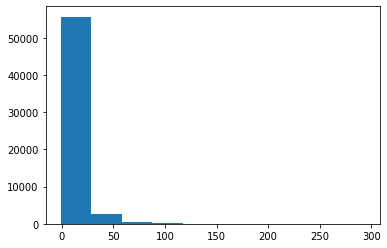

In [69]:
plt.hist(adm["stay_days"])

In [70]:
adm

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,stay,stay_days
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,...,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,1 days 03:28:00,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,...,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,5 days 11:55:00,5
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,...,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1,6 days 18:26:00,6
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,...,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1,2 days 20:34:00,2
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,...,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1,3 days 12:49:00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,...,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1,2 days 17:49:00,2
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,...,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1,0 days 13:10:00,0
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,...,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1,8 days 04:53:00,8
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,...,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0,41 days 10:42:00,41
